# Neural Network Multiclass Classification

## Objective

To build model to predict fashion items into classes

## Data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true

### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
| ----------- | ----------- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Data Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and testing dataset 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# view dataset
print(f"Training features:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training features:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [3]:
# check data shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# check 1 sample data shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

dataset contains 60000 training samples, and 10000 testing samples with image size (28 pixel x 28 pixel)

In [5]:
# define class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# number of classes 
len(class_names)

10

Label Fashion: 2 (Pullover)


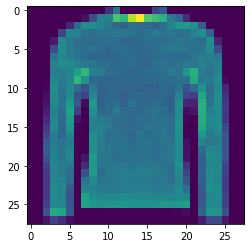

In [6]:
# plot 1 sample
import matplotlib.pyplot as plt

i=37

plt.imshow(train_data[i])

# print the label
print(f"Label Fashion: {train_labels[i]} ({class_names[train_labels[i]]})")

#### Scaling data (Normalization)

In [7]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [8]:
# Divide train and test data values by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

data is normalized and the values are between 0 and 1

#### Neural Network Architecture

1. **Input shape** : the shape of input tensor is 28x28 (height and width image), we have to make this tensor as a vector with the shape of (784)
2. **Output shape** : 10 becasue the model will predict data into 10 different classes. 
3. **Loss Function** : multiclass loss function (categoricalcrossentropy())


### Model 1

In [9]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # reshape tensor (28 x 28) to (784)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # use SparseCategoricalCrossentropy() so we don't need to one-hot-encode classes
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit he model
norm_history = model_1.fit(train_data,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5449 - val_accuracy: 0.8131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5023 - accuracy: 0.8263 - val_loss: 0.5863 - val_accuracy: 0.8027
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4681 - accuracy: 0.8386 - val_loss: 0.5106 - val_accuracy: 0.8163
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4490 - accuracy: 0.8456 - val_loss: 0.4888 - val_accuracy: 0.8293
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.5037 - val_accuracy: 0.8226
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4323 - accuracy: 0.8504 - val_loss: 0.4788 - val_accuracy: 0.8339
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4262 - accuracy: 0.8511 - val_loss: 0.4784 - val_accuracy:

<AxesSubplot:title={'center':'Model 1 (Normalized)'}>

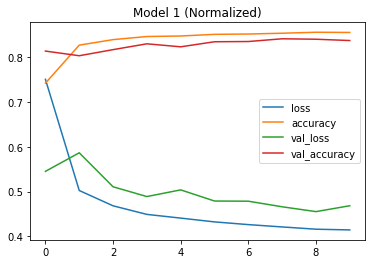

In [10]:
# plot loss curves / model history
import pandas as pd
pd.DataFrame(norm_history.history).plot(title='Model 1 (Normalized)')

### Model 2 : Find the ideal learning rate

In [11]:
# set randomm seed
tf.random.set_seed(42)

# create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model 
find_lr_history = model_2.fit(train_data,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5449 - val_accuracy: 0.8131 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8260 - val_loss: 0.6001 - val_accuracy: 0.8003 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4696 - accuracy: 0.8380 - val_loss: 0.5108 - val_accuracy: 0.8167 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8437 - val_loss: 0.4900 - val_accuracy: 0.8287 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4467 - accuracy: 0.8441 - val_loss: 0.5107 - val_accuracy: 0.8182 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8468 - val_loss: 0.4926 - val_accuracy: 0.8250 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Learning Rate Decay Curve')

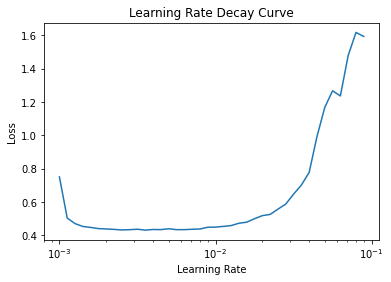

In [12]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Decay Curve')

The ideal learning rate is somewhere close to the default learning rate of the Adam optimizer (0.001), let's say 0.001. Then refit the model using the ideal learning rate.

### Model 3 : Refit model using the ideal learning rate

In [13]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                       train_labels,
                       epochs=40,
                       validation_data=(test_data, test_labels))

Epoch 1/40


C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5449 - val_accuracy: 0.8131
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5023 - accuracy: 0.8263 - val_loss: 0.5863 - val_accuracy: 0.8027
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8386 - val_loss: 0.5106 - val_accuracy: 0.8163
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4490 - accuracy: 0.8456 - val_loss: 0.4888 - val_accuracy: 0.8293
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.5037 - val_accuracy: 0.8226
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4323 - accuracy: 0.8504 - val_loss: 0.4788 - val_accuracy: 0.8339
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4262 - accuracy: 0.8511 - val_loss: 0.4784 - val_accuracy: 0.8344
Epo

### Model 4 : Enlarge Batch size

In [33]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# fit the model
history_4 = model_4.fit(train_data,
                       train_labels,
                        batch_size=64,
                       epochs=40,
                       validation_data=(test_data, test_labels))

Epoch 1/40
938/938 [==============================] - 3s 2ms/step - loss: 0.8749 - accuracy: 0.7067 - val_loss: 0.6018 - val_accuracy: 0.7996
Epoch 2/40
938/938 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.8195 - val_loss: 0.5601 - val_accuracy: 0.8137
Epoch 3/40
938/938 [==============================] - 3s 3ms/step - loss: 0.4975 - accuracy: 0.8342 - val_loss: 0.5323 - val_accuracy: 0.8158
Epoch 4/40
938/938 [==============================] - 2s 2ms/step - loss: 0.4680 - accuracy: 0.8416 - val_loss: 0.4894 - val_accuracy: 0.8309
Epoch 5/40
938/938 [==============================] - 2s 2ms/step - loss: 0.4495 - accuracy: 0.8449 - val_loss: 0.4878 - val_accuracy: 0.8319
Epoch 6/40
938/938 [==============================] - 2s 2ms/step - loss: 0.4377 - accuracy: 0.8490 - val_loss: 0.4761 - val_accuracy: 0.8350
Epoch 7/40
938/938 [==============================] - 2s 2ms/step - loss: 0.4296 - accuracy: 0.8499 - val_loss: 0.4838 - val_accuracy: 0.8290
Epoch 

### Evaluate Model

In [14]:
# Makes a labelled confusion matrix comparing predictions and ground truth labels
## If classes is passed, confusion matrix will be labelled, if not, integer class values will be used

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    
    # Plot the figure
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes), 
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [34]:
# make prediction using model_3

## Model will output prediction probability
## The higher probability means the model believes that is the right class

y_probs = model_4.predict(test_data)

# view the first 5 prediction probabilities
y_probs[:5]

313/313 [==============================] - 0s 897us/step


array([[2.95222158e-12, 5.80251314e-09, 1.92678215e-07, 1.04859441e-06,
        1.80866884e-11, 8.03331211e-02, 6.46705259e-12, 7.16923326e-02,
        5.48268702e-07, 8.47972751e-01],
       [2.03168995e-04, 2.20662582e-06, 9.41386998e-01, 2.02903024e-07,
        4.10833657e-02, 2.02923849e-17, 1.73184387e-02, 2.35106878e-24,
        5.67081224e-06, 1.28308462e-18],
       [3.63405590e-08, 9.99989986e-01, 5.37295541e-09, 9.81568519e-06,
        5.25704680e-09, 1.29944346e-18, 1.78273822e-07, 7.17669022e-37,
        1.58747251e-10, 1.09066077e-19],
       [2.28408155e-07, 9.99879599e-01, 1.95942732e-07, 1.19232696e-04,
        1.02893509e-07, 6.17019541e-15, 6.87134957e-07, 1.05034946e-31,
        2.32347586e-09, 6.47872473e-16],
       [1.28617212e-01, 2.78335967e-04, 1.68053925e-01, 1.10870833e-02,
        1.07274674e-01, 2.43861897e-12, 5.80300093e-01, 2.94408154e-14,
        4.38872259e-03, 1.36364170e-10]], dtype=float32)

In [35]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [36]:
# convert all the prediction probabilities to prediction labels
y_preds = y_probs.argmax(axis=1)

# view the first 5 prediction labels
y_preds[:5]

array([9, 2, 1, 1, 6], dtype=int64)

#### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[820,   2,  15,  56,   4,   0,  88,   0,  15,   0],
       [  5, 948,   5,  33,   5,   0,   2,   0,   2,   0],
       [ 16,   2, 732,  13, 136,   0,  88,   0,  13,   0],
       [ 33,  10,  12, 856,  42,   0,  35,   2,   9,   1],
       [  0,   1,  99,  34, 775,   2,  82,   0,   7,   0],
       [  0,   0,   0,   2,   0, 936,   0,  35,   5,  22],
       [157,   1,  97,  39,  78,   1, 608,   3,  16,   0],
       [  0,   0,   0,   0,   0,  26,   0, 958,   0,  16],
       [  4,   1,   3,  15,   4,   2,  19,   6, 946,   0],
       [  0,   0,   1,   1,   0,  15,   0,  51,   0, 932]], dtype=int64)

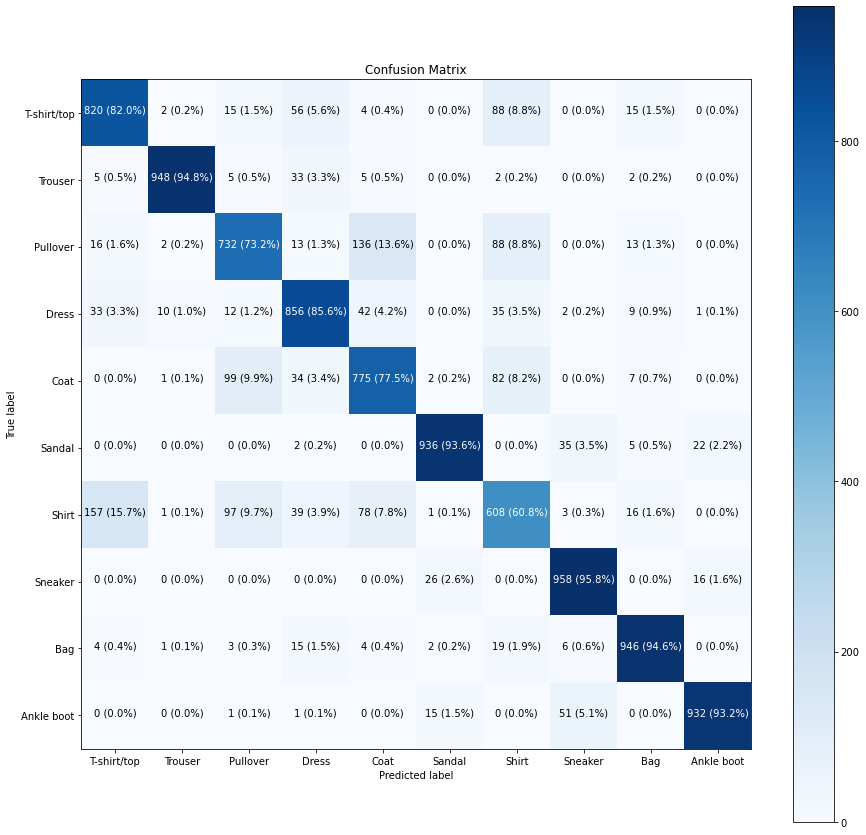

In [38]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

1. The model mostly gets confused on predict Shirt and Pullover class. 
2. It seems to mix up classes which are similar, for example, Shirt and T-shirt/Top, Shirt and Pullover, Shirt and Coat, Coat and Pullover. 
3. The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

### Summary

In [39]:
# the accuracy of the model
loss, accuracy = model_4.evaluate(test_data, test_labels)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8511
Model loss on test set: 0.4374561905860901
Model accuracy on test set: 85.11%


In [40]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# weight matrix shape = input layer shape : 784 (28x28pixel) 
## each neuron has weight matrix, number of neuron = 8
weights, weights.shape

(array([[ 1.0802724 , -0.90767175, -0.06577335, ...,  0.03214733,
          0.43584096,  0.46530914],
        [-0.70165986,  0.0685225 ,  0.7804588 , ...,  0.00836685,
          0.59669864, -0.61029625],
        [-0.32164794, -1.1351919 ,  0.48704728, ...,  0.00797877,
          1.2524124 , -0.63355625],
        ...,
        [-0.02772969,  0.28454778,  0.18766296, ..., -0.09203849,
          0.28984886, -0.0407622 ],
        [-0.47301432,  0.19970337,  0.69449025, ..., -0.04269093,
         -0.05496743,  1.1447383 ],
        [-0.5237885 ,  0.5319699 ,  0.23787533, ...,  0.00670667,
          0.55667174, -0.04680058]], dtype=float32),
 (784, 8))

In [41]:
# calculate the number of parameters in the model
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 8)                 6280      
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

# the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)